#Setting up environment

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook 
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [0]:
sns.set()

#Reading the dataset from Google Drive

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1uzTCX4ticEz6vGG3kvNVVbLTRuEs6kHa'}) 
downloaded.GetContentFile('Train.xls') 

In [266]:
dataframe = pd.read_csv("Train.xls")
dataframe.shape

(330045, 7)

In [267]:
dataframe.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [268]:
dataframe.tail()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0
330044,300553,j,2001.0,4.0,154692,2554.0,37.0


In [269]:
dataframe.shape

(330045, 7)

In [270]:
dataframe.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


#Data Preprocessing

In [271]:
dataframe.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [272]:
print(dataframe['Upvotes'].median(), dataframe['Answers'].median())

28.0 3.0


In [0]:
dataframe['Upvotes'] = dataframe['Upvotes'].replace(0.0, np.nan)
dataframe['Upvotes'].fillna(dataframe['Upvotes'].median(), inplace = True)
dataframe['Answers'] = dataframe['Answers'].replace(0.0, np.nan)
dataframe['Answers'].fillna(dataframe['Answers'].median(), inplace = True)
dataframe['Reputation'] = dataframe['Reputation'].replace(0.0, np.nan)
dataframe['Reputation'].fillna(dataframe['Reputation'].median(), inplace = True)
dataframe['Views'] = dataframe['Views'].replace(0.0, np.nan)
dataframe['Views'].fillna(dataframe['Views'].median(), inplace = True)

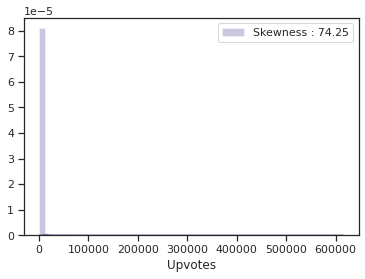

In [274]:
# Explore Fare distribution 
g = sns.distplot(dataframe["Upvotes"], color="m", label="Skewness : %.2f"%(dataframe["Upvotes"].skew()))
g = g.legend(loc="best")

In [275]:
# Apply log to Fare to reduce skewness distribution
dataframe["Upvotes"] = dataframe["Upvotes"].map(lambda i: np.log(i) if i > 0 else 0)
dataframe["Upvotes"]

0         3.737670
1         7.069023
2         4.094345
3         2.197225
4         4.418841
            ...   
330040    3.367296
330041    4.290459
330042    2.708050
330043    1.098612
330044    3.610918
Name: Upvotes, Length: 330045, dtype: float64

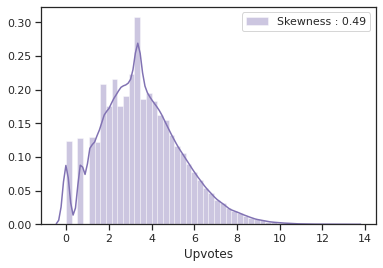

In [276]:
# Explore Fare distribution 
g = sns.distplot(dataframe["Upvotes"], color="m", label="Skewness : %.2f"%(dataframe["Upvotes"].skew()))
g = g.legend(loc="best")

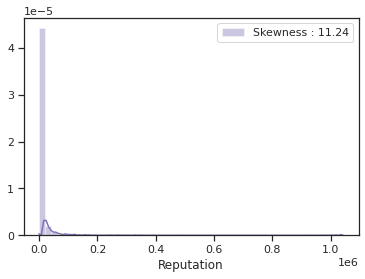

In [277]:
g = sns.distplot(dataframe["Reputation"], color="m", label="Skewness : %.2f"%(dataframe["Reputation"].skew()))
g = g.legend(loc="best")

In [278]:
# Apply log to Fare to reduce skewness distribution
dataframe["Reputation"] = dataframe["Reputation"].map(lambda i: np.log(i) if i > 0 else 0)
dataframe["Reputation"]

0          8.279443
1         10.167619
2          7.213768
3          5.575949
4          8.359603
            ...    
330040     3.583519
330041     7.407924
330042     8.728750
330043     4.488636
330044     7.601402
Name: Reputation, Length: 330045, dtype: float64

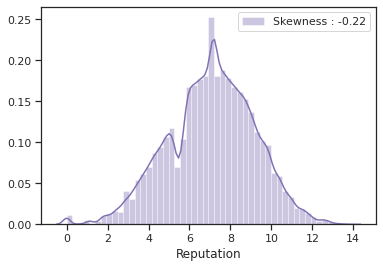

In [279]:
g = sns.distplot(dataframe["Reputation"], color="m", label="Skewness : %.2f"%(dataframe["Reputation"].skew()))
g = g.legend(loc="best")

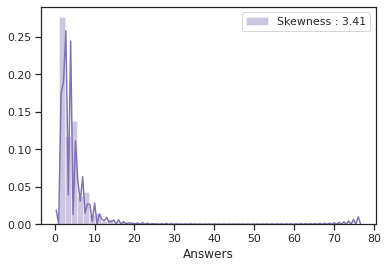

In [280]:
g = sns.distplot(dataframe["Answers"], color="m", label="Skewness : %.2f"%(dataframe["Answers"].skew()))
g = g.legend(loc="best")

In [281]:
# Apply log to Fare to reduce skewness distribution
dataframe["Answers"] = dataframe["Answers"].map(lambda i: np.log(i) if i > 0 else 0)
dataframe["Answers"]

0         0.693147
1         2.484907
2         1.386294
3         1.098612
4         1.386294
            ...   
330040    0.693147
330041    0.693147
330042    0.693147
330043    0.693147
330044    1.386294
Name: Answers, Length: 330045, dtype: float64

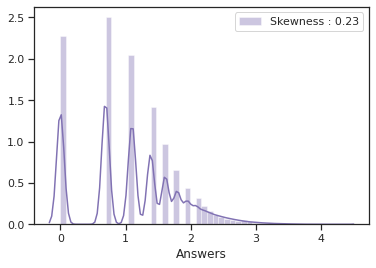

In [282]:
g = sns.distplot(dataframe["Answers"], color="m", label="Skewness : %.2f"%(dataframe["Answers"].skew()))
g = g.legend(loc="best")

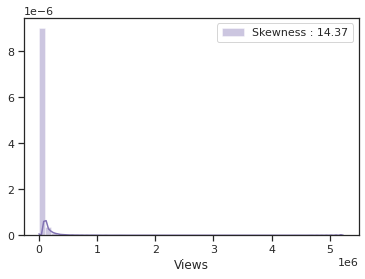

In [283]:
g = sns.distplot(dataframe["Views"], color="m", label="Skewness : %.2f"%(dataframe["Views"].skew()))
g = g.legend(loc="best")

In [284]:
# Apply log to Fare to reduce skewness distribution
dataframe["Views"] = dataframe["Views"].map(lambda i: np.log(i) if i > 0 else 0)
dataframe["Views"]

0          8.968906
1         10.929547
2          8.995537
3         10.205960
4          9.545812
            ...    
330040     6.968850
330041    10.057024
330042     7.805067
330043     7.653020
330044     7.845416
Name: Views, Length: 330045, dtype: float64

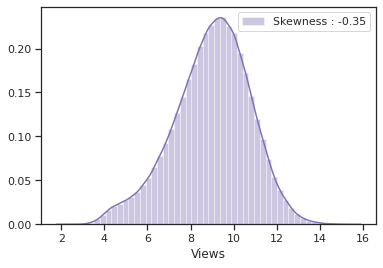

In [285]:
g = sns.distplot(dataframe["Views"], color="m", label="Skewness : %.2f"%(dataframe["Views"].skew()))
g = g.legend(loc="best")

In [286]:
dataframe.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,8.279443,0.693147,155623,8.968906,3.737670
1,327662,a,10.167619,2.484907,21781,10.929547,7.069023
2,468453,c,7.213768,1.386294,56177,8.995537,4.094345
3,96996,a,5.575949,1.098612,168793,10.205960,2.197225
4,131465,c,8.359603,1.386294,112223,9.545812,4.418841


In [287]:
dataframe.tail()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
330040,339800,c,3.583519,0.693147,84919,6.968850,3.367296
330041,253800,c,7.407924,0.693147,76730,10.057024,4.290459
330042,210756,c,8.728750,0.693147,91701,7.805067,2.708050
330043,56089,j,4.488636,0.693147,80245,7.653020,1.098612
330044,300553,j,7.601402,1.386294,154692,7.845416,3.610918


In [288]:
dataframe.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000
mean,235748.682789,7.080888,1.082629,81442.888803,8.966024,3.526322
std,136039.418471,2.097439,0.743444,49215.100730,1.778629,1.865104
min,1.000000,0.000000,0.000000,0.000000,2.197225,0.000000
25%,117909.000000,5.802118,0.693147,39808.000000,7.860956,2.197225
50%,235699.000000,7.173192,1.098612,79010.000000,9.099856,3.367296
75%,353620.000000,8.540519,1.609438,122559.000000,10.198766,4.672829
max,471493.000000,13.857063,4.330733,175738.000000,15.470124,13.329829


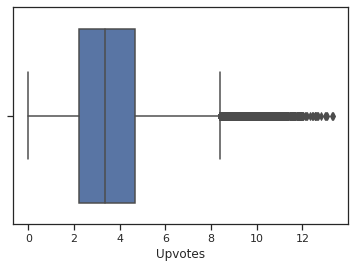

In [289]:
sns.boxplot(x=dataframe['Upvotes'])

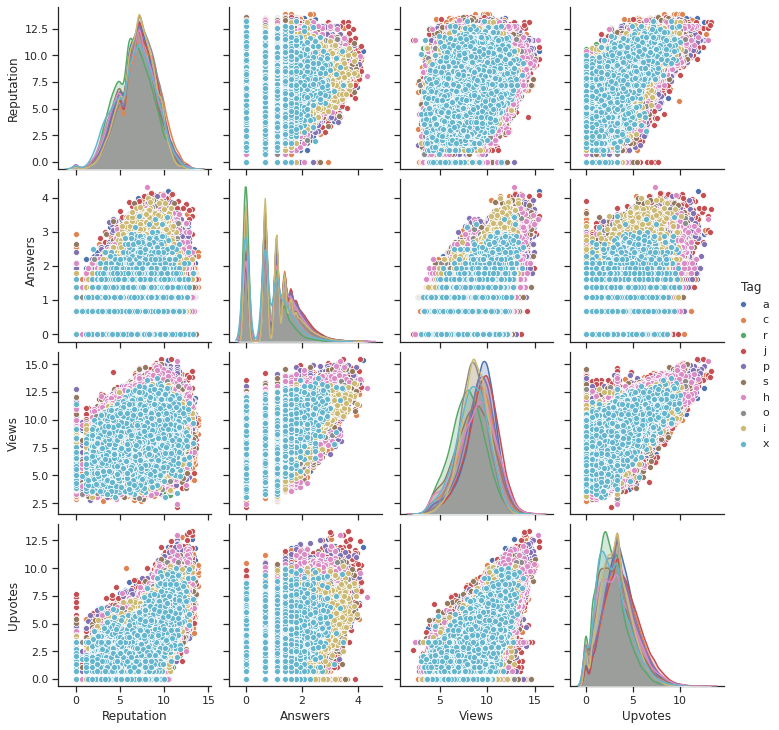

In [290]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataframe, hue="Tag", vars=["Reputation", "Answers", "Views", "Upvotes"])

#One Hot Encoding Tag Attribute

Text(0, 0.5, 'Frequency')

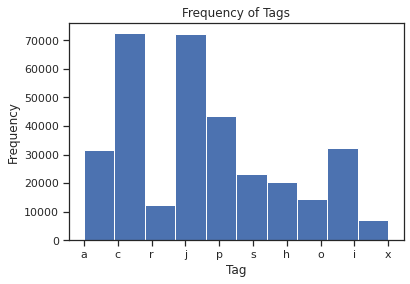

In [291]:
fig, ax = plt.subplots()
# plot histogram
ax.hist(dataframe['Tag'])
# set title and labels
ax.set_title('Frequency of Tags')
ax.set_xlabel('Tag')
ax.set_ylabel('Frequency')

In [292]:
dataframe['Tag'].unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [293]:
one_hot = pd.get_dummies(dataframe['Tag'])
print(one_hot)

        a  c  h  i  j  o  p  r  s  x
0       1  0  0  0  0  0  0  0  0  0
1       1  0  0  0  0  0  0  0  0  0
2       0  1  0  0  0  0  0  0  0  0
3       1  0  0  0  0  0  0  0  0  0
4       0  1  0  0  0  0  0  0  0  0
...    .. .. .. .. .. .. .. .. .. ..
330040  0  1  0  0  0  0  0  0  0  0
330041  0  1  0  0  0  0  0  0  0  0
330042  0  1  0  0  0  0  0  0  0  0
330043  0  0  0  0  1  0  0  0  0  0
330044  0  0  0  0  1  0  0  0  0  0

[330045 rows x 10 columns]


In [0]:
dataframe = dataframe.drop('Tag',axis = 1)
dataframe = dataframe.join(one_hot)

In [0]:
dataframe.rename(columns = {'a':'Category_A', 'c':'Category_C', 
                              'h':'Category_H', 'i':'Category_I',
                              'j':'Category_J', 'o':'Category_O',
                              'p':'Category_P', 'r':'Category_R',
                              's':'Category_S', 'x':'Category_X'}, inplace = True)

In [296]:
dataframe.head()

,ID,Reputation,Answers,Username,Views,Upvotes,Category_A,Category_C,Category_H,Category_I,Category_J,Category_O,Category_P,Category_R,Category_S,Category_X
0,52664,8.279443,0.693147,155623,8.968906,3.737670,1,0,0,0,0,0,0,0,0,0
1,327662,10.167619,2.484907,21781,10.929547,7.069023,1,0,0,0,0,0,0,0,0,0
2,468453,7.213768,1.386294,56177,8.995537,4.094345,0,1,0,0,0,0,0,0,0,0
3,96996,5.575949,1.098612,168793,10.205960,2.197225,1,0,0,0,0,0,0,0,0,0
4,131465,8.359603,1.386294,112223,9.545812,4.418841,0,1,0,0,0,0,0,0,0,0


#Data Visualization

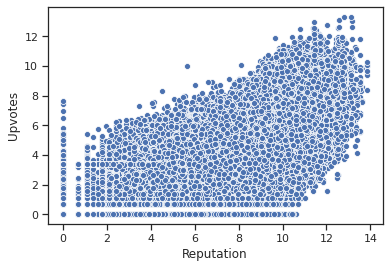

In [297]:
ax = sns.scatterplot(x="Reputation", y="Upvotes", data=dataframe)

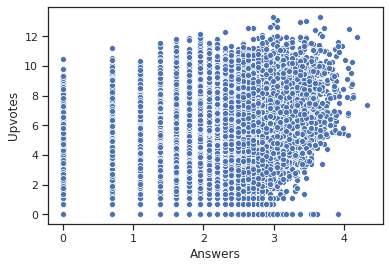

In [298]:
ax = sns.scatterplot(x="Answers", y="Upvotes", data=dataframe)

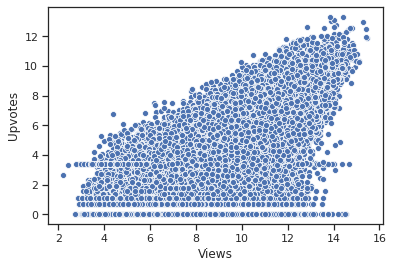

In [299]:
ax = sns.scatterplot(x="Views", y="Upvotes", data=dataframe)

In [300]:
dataframe['Views'].describe()

count    330045.000000
mean          8.966024
std           1.778629
min           2.197225
25%           7.860956
50%           9.099856
75%          10.198766
max          15.470124
Name: Views, dtype: float64

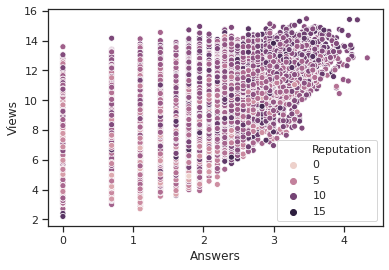

In [301]:
ax = sns.scatterplot(x="Answers", y="Views", hue="Reputation", data=dataframe)

In [302]:
X = dataframe.drop(['Upvotes','Username','ID'], axis=1)
X = X.fillna(0)
X.shape

(330045, 13)

In [303]:
X.head()

,Reputation,Answers,Views,Category_A,Category_C,Category_H,Category_I,Category_J,Category_O,Category_P,Category_R,Category_S,Category_X
0,8.279443,0.693147,8.968906,1,0,0,0,0,0,0,0,0,0
1,10.167619,2.484907,10.929547,1,0,0,0,0,0,0,0,0,0
2,7.213768,1.386294,8.995537,0,1,0,0,0,0,0,0,0,0
3,5.575949,1.098612,10.205960,1,0,0,0,0,0,0,0,0,0
4,8.359603,1.386294,9.545812,0,1,0,0,0,0,0,0,0,0


In [304]:
Y = np.array(dataframe['Upvotes'])
Y

array([3.73766962, 7.06902343, 4.09434456, ..., 2.7080502 , 1.09861229,
       3.61091791])

In [305]:
scaler = MinMaxScaler()
X[['Reputation','Views','Answers']] = scaler.fit_transform(X[['Reputation','Views','Answers']])
X.head(5)

,Reputation,Answers,Views,Category_A,Category_C,Category_H,Category_I,Category_J,Category_O,Category_P,Category_R,Category_S,Category_X
0,0.597489,0.160053,0.510189,1,0,0,0,0,0,0,0,0,0
1,0.733750,0.573784,0.657906,1,0,0,0,0,0,0,0,0,0
2,0.520584,0.320106,0.512195,0,1,0,0,0,0,0,0,0,0
3,0.402390,0.253678,0.603390,1,0,0,0,0,0,0,0,0,0
4,0.603274,0.320106,0.553654,0,1,0,0,0,0,0,0,0,0


#Train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=58)

In [307]:
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(264036, 13) (264036,) (66009, 13) (66009,)


In [308]:
X_train.head()

,Reputation,Answers,Views,Category_A,Category_C,Category_H,Category_I,Category_J,Category_O,Category_P,Category_R,Category_S,Category_X
167028,0.725110,0.371632,0.356759,0,0,0,0,1,0,0,0,0,0
213025,0.595785,0.160053,0.398044,0,0,0,0,0,0,1,0,0,0
207953,0.660661,0.320106,0.603384,0,1,0,0,0,0,0,0,0,0
323361,0.337888,0.413731,0.513445,0,0,0,0,1,0,0,0,0,0
183097,0.710728,0.371632,0.688599,0,0,0,0,1,0,0,0,0,0


In [309]:
X_test.head()

,Reputation,Answers,Views,Category_A,Category_C,Category_H,Category_I,Category_J,Category_O,Category_P,Category_R,Category_S,Category_X
263452,0.657933,0.253678,0.554425,0,1,0,0,0,0,0,0,0,0
273289,0.140427,0.253678,0.207305,1,0,0,0,0,0,0,0,0,0
52658,0.695216,0.253678,0.514522,0,0,0,1,0,0,0,0,0,0
96064,0.309623,0.320106,0.654141,0,0,0,0,1,0,0,0,0,0
61100,0.480939,0.000000,0.562923,0,0,0,0,0,0,1,0,0,0


In [310]:
Y_train

array([3.66356165, 2.77258872, 5.70378247, ..., 5.25227343, 3.17805383,
       3.13549422])

In [311]:
Y_test

array([5.0369526 , 1.94591015, 4.48863637, ..., 9.07486423, 2.07944154,
       1.94591015])

In [312]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(loss = 'epsilon_insensitive', verbose=2, eta0=0.01)
reg.fit(X_train, Y_train)

-- Epoch 1
Norm: 7.64, NNZs: 13, Bias: -2.122553, T: 264036, Avg. loss: 0.854024
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 9.02, NNZs: 13, Bias: -3.043503, T: 528072, Avg. loss: 0.724647
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 9.70, NNZs: 13, Bias: -3.441546, T: 792108, Avg. loss: 0.705075
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 10.05, NNZs: 13, Bias: -3.658043, T: 1056144, Avg. loss: 0.699273
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 10.24, NNZs: 13, Bias: -3.794356, T: 1320180, Avg. loss: 0.697173
Total training time: 0.35 seconds.
-- Epoch 6
Norm: 10.35, NNZs: 13, Bias: -3.882562, T: 1584216, Avg. loss: 0.696470
Total training time: 0.42 seconds.
-- Epoch 7
Norm: 10.44, NNZs: 13, Bias: -3.903438, T: 1848252, Avg. loss: 0.696127
Total training time: 0.49 seconds.
-- Epoch 8
Norm: 10.49, NNZs: 13, Bias: -3.933702, T: 2112288, Avg. loss: 0.695949
Total training time: 0.56 seconds.
-- Epoch 9
Norm: 10.52, NNZs: 13, Bias: -3.955109, T: 2376324,

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=2, warm_start=False)


Some Inferences: 
Training data Upvote labels [2.77258872 5.70378247 4.09434456 6.97634807 4.4308168  2.19722458
 3.4339872 ]
Predicted data Upvote labels [3.13956928 5.33275892 2.38479515 6.34002961 3.98077321 2.30073968
 3.46192027]


Mean of predictions :  3.4210946166477547
Mean of Y_train  :  3.524698266742065
Maximum of Y_train :  13.329829477173059
Minimum of Y_train :  0.0
Maximum of predictions :  10.139015203275166
Minimum of predictions :  -3.7017867931180923

Mean Absolute Error: 22.4459 % 



Text(0, 0.5, 'Y_train')

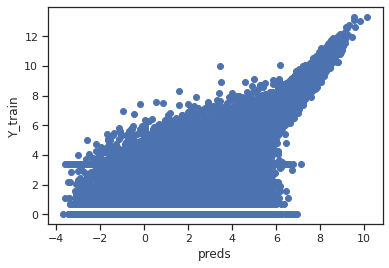

In [320]:
print("\nSome Inferences: ")
print("Training data Upvote labels",Y_train[1:8])
train_pred=reg.predict(X_train)
print("Predicted data Upvote labels",train_pred[1:8])
print("\n")
print("Mean of predictions : ",np.mean(train_pred))
print("Mean of Y_train  : ",np.mean(Y_train))
print("Maximum of Y_train : ",max(Y_train))
print("Minimum of Y_train : ",min(Y_train))
print("Maximum of predictions : ",max(train_pred))
print("Minimum of predictions : ",min(train_pred))
errors = (train_pred-Y_train)/np.mean(Y_train)
print('\nMean Absolute Error:', round(np.mean(np.abs(errors)) * 100, 4),'%','\n')

plt.scatter(x=train_pred,y=Y_train)
plt.xlabel("preds")
plt.ylabel("Y_train")


Inferences obtained from testing set. 

Predicted upvote values:  [-1.46669306  4.61244379  3.19170213  3.46752167  2.04276191  6.46075669
  4.67860927]
Y_test upvote values:  [1.94591015 4.48863637 4.12713439 4.36944785 2.94443898 8.01301211
 4.93447393]


Mean of predictions :  3.427627603221686
Mean of valid_labels :  3.532819369778933
Maximum of predictions :  9.640724347773897
Minimum of predictions :  -3.8176143758647108
Maximum of testing_labels :  13.007421551685674
Minimum of testing_labels :  0.0
-2.2235533733622934

Mean Absolute Error: 22.2836 %





Text(0, 0.5, 'Y_train')

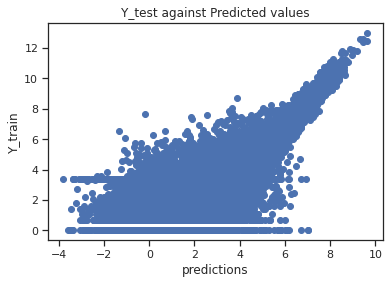

In [314]:
predictions = reg.predict(X_test)
print("\nInferences obtained from testing set. \n")
print("Predicted upvote values: ", predictions[1:8])
print("Y_test upvote values: ", Y_test[1:8])
print("\n\nMean of predictions : ",np.mean(predictions))
print("Mean of valid_labels : ",np.mean(Y_test))
print("Maximum of predictions : ",max(predictions))
print("Minimum of predictions : ",min(predictions))
print("Maximum of testing_labels : ",max(Y_test))
print("Minimum of testing_labels : ",min(Y_test))
errors = (predictions - Y_test)/np.mean(Y_test)
print(min(errors))
print('\nMean Absolute Error:', round(np.mean(np.abs(errors)) * 100, 4),'%')
print("\n\n")
plt.scatter(x=predictions,y=Y_test)
plt.title("Y_test against Predicted values")
plt.xlabel("predictions")
plt.ylabel("Y_train")

In [315]:
#Random forest Regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
tree_reg = RandomForestRegressor(n_estimators = 100, random_state = 100, verbose=2)
tree_reg.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=2, warm_start=False)

In [316]:
Y_pred = tree_reg.predict(X_test)
error = mean_squared_error(Y_test, Y_pred)
print(error)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.7128065751850713


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


In [317]:
print("Some predicted upvotes: \n")
Y_pred[0:25]

Some predicted upvotes: 



array([4.91474442, 2.13479435, 4.99809842, 2.78044597, 3.05249433,
       2.7417238 , 7.63715568, 4.43227329, 2.37943926, 5.85162294,
       1.83596693, 4.23177561, 5.23230006, 1.70870688, 2.11990764,
       4.40066409, 3.63091673, 2.78273639, 3.08431559, 9.04090277,
       3.59357129, 4.6159585 , 5.10282423, 7.15920309, 2.88710163])

In [318]:
print("True value of upvotes: \n")
Y_test[0:25]

True value of upvotes: 



array([5.0369526 , 1.94591015, 4.48863637, 4.12713439, 4.36944785,
       2.94443898, 8.01301211, 4.93447393, 3.87120101, 5.83188248,
       3.36729583, 4.60517019, 5.44673737, 1.94591015, 4.85203026,
       3.95124372, 2.94443898, 4.7095302 , 2.94443898, 8.88779076,
       4.63472899, 4.27666612, 4.49980967, 7.40306109, 1.94591015])

In [319]:
import math
print('RMSE:',math.sqrt(error))

RMSE: 0.8442787307430356
